# 人工神经网络
## 从结构模拟到功能模拟
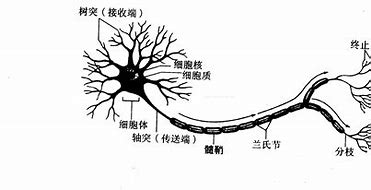
### 随机初始化的网络：
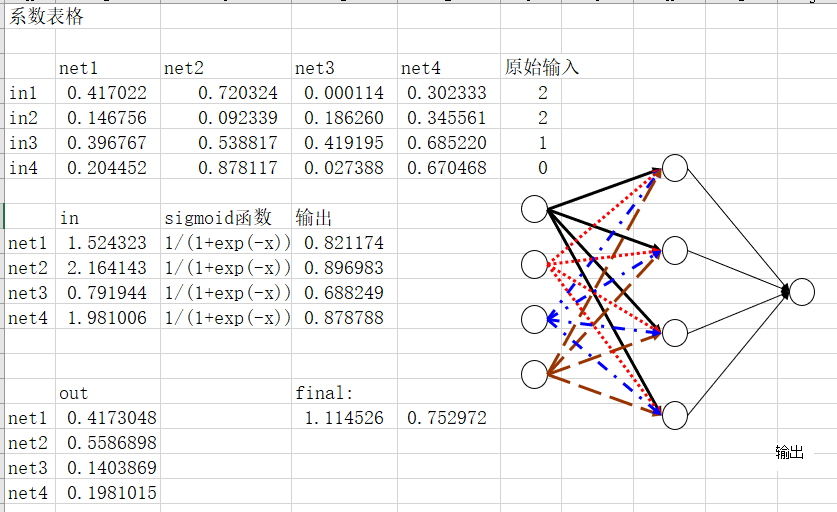
### 训练后的网络：
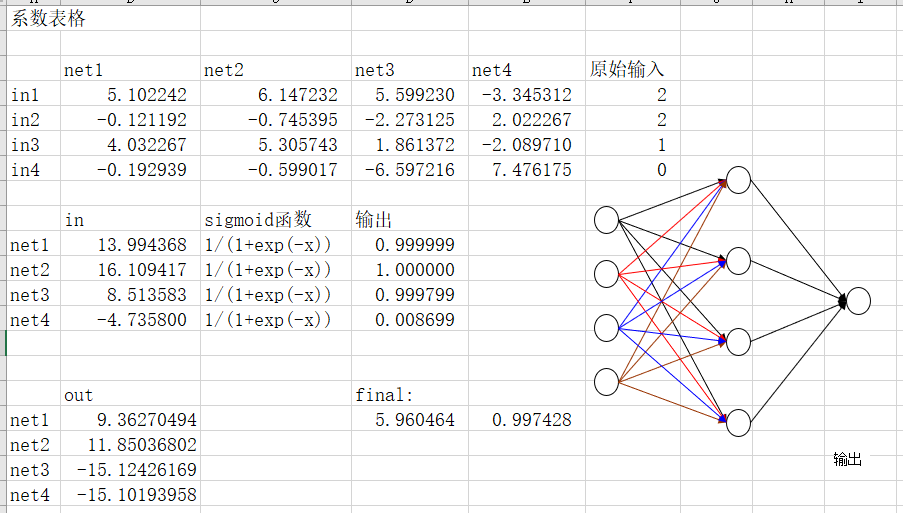

In [1]:
import numpy as np
import pandas as pd
#构建数据集
def createDataSet():
    dataSet = [[0,2,0,0,0],[0,2,0,1,0],[1,2,0,0,1],[2,1,0,0,1], 
               [2,0,1,0,1],[2,0,1,1,0],[1,0,1,1,1],[0,1,0,0,0], 
               [0,0,1,0,1],[2,1,1,0,1],[0,1,1,1,1],[1,1,0,1,1], 
               [1,2,1,0,1],[2,1,0,1,0]]
    
    labels = ['Age', 'Income', 'Job', 'Credit','Class']
    return dataSet,labels

ds1,lab = createDataSet()
X=np.array(ds1)[:,0:4]
Y=np.array(ds1)[:,4].reshape(14,1)
print(X)
print(Y)

[[0 2 0 0]
 [0 2 0 1]
 [1 2 0 0]
 [2 1 0 0]
 [2 0 1 0]
 [2 0 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [0 0 1 0]
 [2 1 1 0]
 [0 1 1 1]
 [1 1 0 1]
 [1 2 1 0]
 [2 1 0 1]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [2]:
#响应函数f
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [3]:
#中间层/隐藏层系数矩阵syn0
#输出层系数syn1
syn0 = np.random.random((4,4)) 
syn1 =np.random.random((4,1))

print ("算法开始时，随机系数矩阵:") 
print ("syn0:" + str(syn0))
print ("syn1:" + str(syn1) ) 

算法开始时，随机系数矩阵:
syn0:[[0.06197193 0.43783069 0.78170198 0.7362552 ]
 [0.63938464 0.53984326 0.14227159 0.52794305]
 [0.68075534 0.76011733 0.7816171  0.8753279 ]
 [0.03052614 0.33430965 0.67510136 0.53570178]]
syn1:[[0.85121892]
 [0.33255724]
 [0.98214522]
 [0.71646878]]


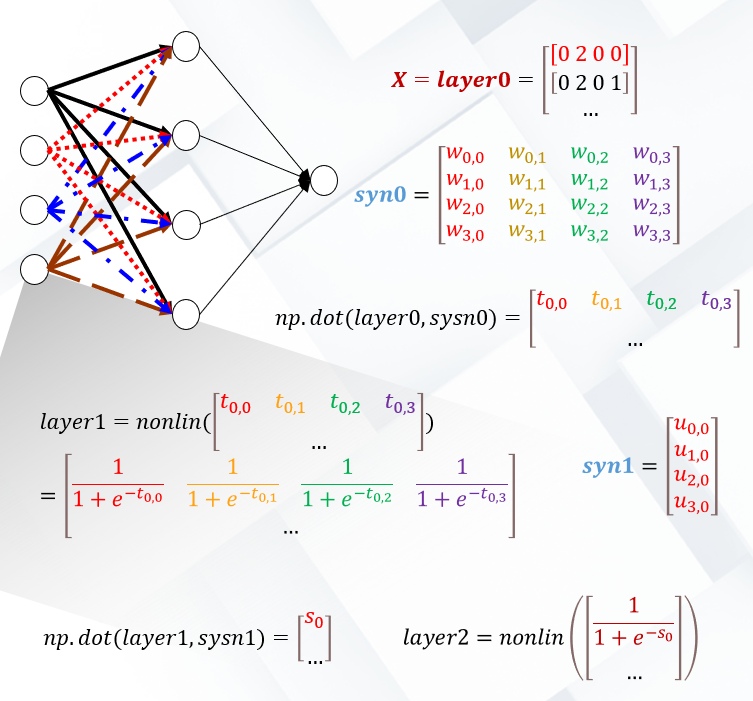
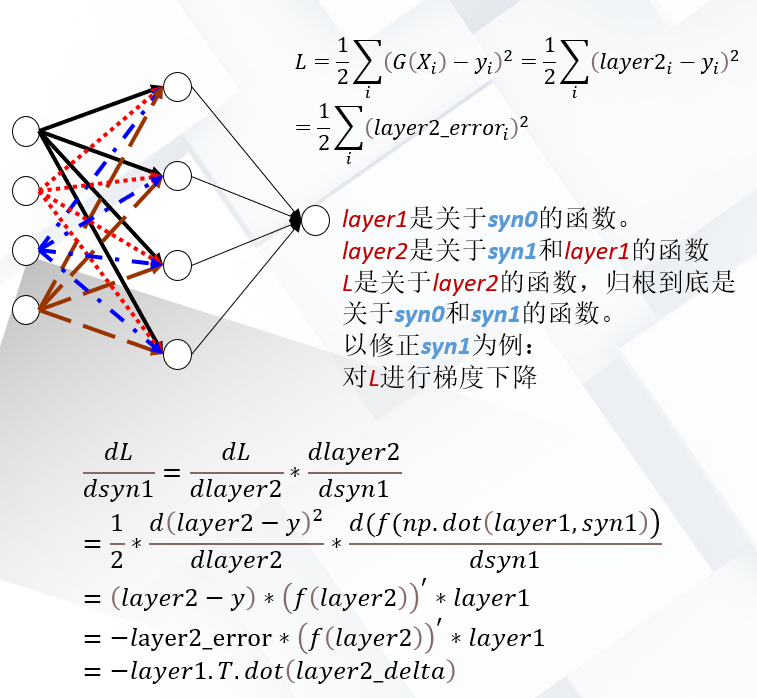

In [4]:
#迭代1000次训练网络
for j in range(1000):
#计算误差
    layer0 = X
    layer1 = nonlin(np.dot(layer0,syn0))
    layer2 = nonlin(np.dot(layer1,syn1))
    
    layer2_error = Y - layer2
#每循环200次输出系数矩阵和误差，
#可以通过这个输出看到系数的不断调整和误差的不断收敛
    if ((j)% 200) == 0:
        print ("After:" +str(j))
        print ("Error:" + str(np.mean(np.abs(layer2_error))))
        print ("syn0:" + str(syn0))
        print ("syn1:" + str(syn1))
#梯度下降法调整系数矩阵
    layer2_delta = layer2_error*nonlin(layer2,deriv=True)
    layer1_error = layer2_delta.dot(syn1.T)
    layer1_delta = layer1_error * nonlin(layer1,deriv=True)
 
    syn1 += layer1.T.dot(layer2_delta)
    syn0 += layer0.T.dot(layer1_delta)

After:0
Error:0.37640525678723025
syn0:[[0.06197193 0.43783069 0.78170198 0.7362552 ]
 [0.63938464 0.53984326 0.14227159 0.52794305]
 [0.68075534 0.76011733 0.7816171  0.8753279 ]
 [0.03052614 0.33430965 0.67510136 0.53570178]]
syn1:[[0.85121892]
 [0.33255724]
 [0.98214522]
 [0.71646878]]
After:200
Error:0.0933958408694177
syn0:[[-1.99420066 -0.47674397  6.25331293  1.69860051]
 [ 3.58805315  0.50467106 -2.18732704  0.04072384]
 [ 2.71159323 -0.42346936  3.26259747 -0.54348237]
 [-0.50745269  3.53356603  1.46625905 -1.48439161]]
syn1:[[ 3.77037923]
 [-6.31431837]
 [ 7.18162803]
 [-4.25567846]]
After:400
Error:0.0405325301104192
syn0:[[-2.58059737 -1.15540444  6.88084897  2.49377561]
 [ 4.19744626  0.55435929 -2.42024737  0.26521015]
 [ 3.43382695  0.02525606  3.28728222 -0.41862978]
 [-0.13386683  4.84020592  1.40955406 -3.08019639]]
syn1:[[ 4.66488417]
 [-7.60738038]
 [ 8.4928198 ]
 [-5.52823832]]
After:600
Error:0.028678801169135123
syn0:[[-2.74546444 -1.3323522   7.0821627   2.76234

In [5]:
print ("最终模型输出 :" + str(layer2))
#输入测试样本[ Age':<30, Income :高, Job:不稳定, Credit:好]
#该样本对应的数值是[0,2,0,1]
layer0 = [0,2,0,1]
layer1 = nonlin(np.dot(layer0,syn0))
layer2 = nonlin(np.dot(layer1,syn1))
print ("Test input :" + str(layer0)+ "Test output :" + str(layer2))

最终模型输出 :[[0.00329802]
 [0.02706608]
 [0.98250876]
 [0.97945035]
 [0.97457236]
 [0.03736617]
 [0.97038074]
 [0.02838824]
 [0.99900565]
 [0.99941924]
 [0.99255932]
 [0.96226983]
 [0.99172873]
 [0.03417879]]
Test input :[0, 2, 0, 1]Test output :[0.02705128]


In [6]:
from numpy import *  
import time  
import matplotlib.pyplot as plt  

#初始化权重矩阵
def initCompetition(n , m , d):
    array = random.random(size=n * m *d)
    com_weight = array.reshape(n,m,d)
    return com_weight

#计算向量的二范数
def cal2NF(X):
    res = 0
    for x in X:
        res += x*x
    return res ** 0.5

#数据集均一化
def normalize(dataSet):
    old_dataSet = copy(dataSet)
    for data in dataSet:
        two_NF = cal2NF(data)
        for i in range(len(data)):
            data[i] = data[i] / two_NF
    return dataSet , old_dataSet

#权重矩阵归一化
def normalize_weight(com_weight):
    for x in com_weight:
        for data in x:
            two_NF = cal2NF(data)
            for i in range(len(data)):
                data[i] = data[i] / two_NF
    return com_weight

In [7]:
#求获胜神经元
def getWinner(data , com_weight):
    max_sim = 0
    n,m,d = shape(com_weight)
    mark_n = 0
    mark_m = 0
    for i in range(n):
        for j in range(m):
            if sum(data * com_weight[i,j]) > max_sim:
                max_sim = sum(data * com_weight[i,j])
                mark_n = i
                mark_m = j
    return mark_n , mark_m

#求N邻域
def getNeibor(n , m , N_neibor , com_weight):
    res = []
    nn,mm , _ = shape(com_weight)
    for i in range(nn):
        for j in range(mm):
            N = int(((i-n)**2+(j-m)**2)**0.5)
            if N<=N_neibor:
                res.append((i,j,N))
    return res

#学习率参数设置
def eta(t,N):
    return (0.3/(t+1))* (math.e ** -N)

# SOM算法核心步骤代码
def do_som(dataSet , com_weight, T , N_neibor):
    for t in range(T-1):
        com_weight = normalize_weight(com_weight)
        for data in dataSet:
            n , m = getWinner(data , com_weight)
            neibor = getNeibor(n , m , N_neibor , com_weight)
            for x in neibor:
                j_n=x[0];j_m=x[1];N=x[2]
#权重系数调整
                com_weight[j_n][j_m] = com_weight[j_n][j_m] + eta(t,N)*(data - com_weight[j_n][j_m])
            N_neibor = N_neibor+1-(t+1)/200
    res = {}
    N , M , _ =shape(com_weight)
    for i in range(len(dataSet)):
        n, m = getWinner(dataSet[i], com_weight)
        key = n*M + m
        if key in res:
            res[key].append(i)
        else:
            res[key] = []
            res[key].append(i)
    return res

#SOM主流程
def SOM(dataSet,com_n,com_m,T,N_neibor):
    dataSet, old_dataSet = normalize(dataSet)
    com_weight = initCompetition(com_n,com_m,shape(dataSet)[1])
    C_res = do_som(dataSet, com_weight, T, N_neibor)
#    draw(C_res, dataSet)
    return C_res, old_dataSet
#    draw(C_res, old_dataSet)

#输出聚类结果
def showCluster(C , dataSet):
#    color = ['r', 'y', 'g', 'b', 'c', 'k', 'm' , 'd']
    mark = ['.r', 'vb', '*g', '1k', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    count = 0
    for i in C.keys():
        X = []
        Y = []
        datas = C[i]
        for j in range(len(datas)):
            X.append(dataSet[datas[j]][0])
            Y.append(dataSet[datas[j]][1])
        #plt.scatter(X, Y, marker='o', color=color[count % len(color)], label=i)
        plt.plot(X,Y,mark[i]) 
        count += 1
    plt.savefig('ANN_Clus_res.png',dpi=300,bbox_inches='tight')
    plt.show()

step 1: 读数...


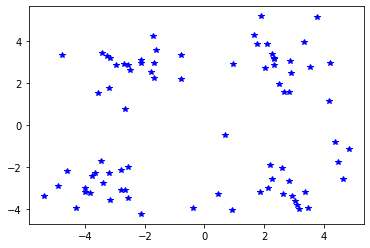

step 2: 聚类...
step 3: 聚类结果...


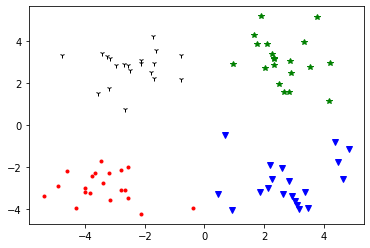

In [8]:
print("step 1: 读数...")
dataSet = []  
fileIn = open('EightyPoints.txt')  
for line in fileIn.readlines():  
    lineArr = line.strip().split(' ')  
    dataSet.append([float(lineArr[0]), float(lineArr[1])])  
dataSetSize = len(dataSet)
dataSetM = mat(dataSet)
for i in range(dataSetSize):
    plt.plot(dataSetM[i, 0], dataSetM[i, 1],'b*') 
plt.savefig('ANN_Clus_orig.png',dpi=300,bbox_inches='tight')
plt.show()
 
print("step 2: 聚类...")  
C_result,OldData = SOM(dataSet,2,2,4,2)
    
print("step 3: 聚类结果...") 
showCluster(C_result, OldData)

In [9]:
# 将人工神经网络回归机引入到股票收益预测

# 加载模块
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [10]:
# 导入中国平安股票数据（主要用到收盘价）
f1 = csv.reader(open('ch15_PinganStock.csv'))
closeprice = [row[4] for row in f1]
del closeprice[0]
p = list(map(float,closeprice))
print(len(p))

382


In [11]:
# 下面分别计算5个输入变量：RDP5，RDP10，RDP15，RDP20，EMA15
# RDP5表示当天之前5天的股票收益率
RDP5=[]
for i in range(len(p)):
    if i>5:
        RDP5.append((p[i]-p[i-5])/p[i-5]*100)    
RDP5=RDP5[14:375]

# RDP10表示当天之前10天的股票收益率
RDP10=[]
for i in range(len(p)):
    if i>10:
        RDP10.append((p[i-5]-p[i-10])/p[i-10]*100) 
RDP10=RDP10[9:370]

# RDP15表示当天之前15天的股票收益率
RDP15=[]
for i in range(len(p)):
    if i>15:
        RDP15.append((p[i-10]-p[i-15])/p[i-15]*100) 
RDP15=RDP15[4:365]

# RDP20表示当天之前20天的股票收益率
RDP20=[]
for i in range(len(p)):
    if i>20:
        RDP20.append((p[i-15]-p[i-20])/p[i-20]*100)    

# EMAn 通过当天收盘价减去该天前n天的价格指数滑动平均值而获得
def get_EMA(cps, days):
    emas = cps.copy()
    for i in range(len(cps)):
        if i < 15:
            emas[i] = cps[i]
        if i >= 15:
            emas[i] = ((days - 1) * emas[i - 1] + 2 * cps[i]) / (days + 1)
    return emas

EMA=get_EMA(p, 15)
EMA15 = [p[i] - EMA[i] for i in range(len(p))]
EMA15 = EMA15[20:381]

# 计算1个输出变量：RDP是首先分别将当天与其后第5天的原始收盘价转换为
# 各自前3天的指数滑动平均值，然后再根据转换的新值求收益率。
p1=get_EMA(p, 3)
RDP=[]
for i in range(len(p1)):
    if i < len(p1)-5:
        RDP.append((p1[i+5]-p1[i])/p1[i]*100)
RDP = RDP[15:376]

In [12]:
#构造数据集用于训练和测试
data = pd.DataFrame()
data['RDP5']=np.array(RDP5)
data['RDP10']=np.array(RDP10)
data['RDP15']=np.array(RDP15)
data['RDP20']=np.array(RDP20)
data['EMA15']=np.array(EMA15)

target = pd.DataFrame()
target = y=np.array(RDP)

# 将整个input_data.csv数据集划分为2个数据子集：
# 训练集324天（2017-11-07至2019-03-07），测试集37天（2019-03-08至2019-04-30）
X_train,X_test,y_train,y_test=train_test_split(data,target,random_state=33,test_size=0.1)
print(len(X_train))
print(len(X_test))
print(y_test[0:5])   #输出前5个的收益率数据

324
37
[ 8.15113085 -3.99219973  0.94123162 -3.91577594 -4.34463169]


In [13]:
#创建mlp神经网络对象
MLPlr = MLPRegressor(activation='logistic', learning_rate='adaptive')
MLPlr.fit(X_train,y_train)
MLPlr_y_predict=MLPlr.predict(X_test)

# 输出性能指标MLP
print('The MSE of MLP is',"%.4f" 
      % mean_squared_error(y_test,MLPlr_y_predict))
print('The MAE of MLP is',"%.4f" 
      % mean_absolute_error(y_test,MLPlr_y_predict))

The MSE of MLP is 1.1465
The MAE of MLP is 0.9002


C:\Users\houfang\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


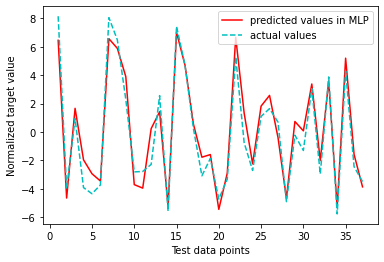

In [14]:
# 可视化预测收益率与真实收益率的对比
point=[]
for i in range(len(X_test)):
    a=1+i
    point.append(a)
plt.plot(point, MLPlr_y_predict, color='red',
         linestyle="-",label='predicted values in MLP')  
plt.plot(point, y_test, color='c',linestyle="--",label='actual values')
plt.xlabel('Test data points')
plt.ylabel('Normalized target value')
plt.legend()
plt.savefig('ANN_stock.png',dpi=300, bbox_inches='tight')
plt.show()